# Stochastic Processes
<style type="text/css">
  .reveal p {
    text-align: left;
  }
  .reveal ul {
    display: block;
  }
  .reveal ol {
    display: block;
  }
</style>
## Introduction
* Stochastic processes are the foundation of economic models
    * Capture risk individual agents face

    * Aggregate risk

    * Estimation etc.

* We'll study how to construct and simulate on a computer
    
    * Introduce some basic programming constructs

* Start with simple random numbers

## How To Generate Random numbers

* Generating random number is as simple as calling `rand()`

* Generates a number in $[0,1]$ uniformly distributed

In [1]:
rand()

0.8679199993039246

* Can even choose between elements of a set

In [2]:
rand([10,20])

20

* If you give it dimensions it will give a vector or matrix of random variables

In [3]:
rand(2,2)

2×2 Matrix{Float64}:
 0.373435  0.588841
 0.195569  0.293997

## Constructing Any Random Variable

* Note any random variable can be constructed from the uniform on $[0,1]$

* Let x be a random variable on $\mathbb R$ 
    * let $F(x)$ be its CDF

* If $\xi$ is a r.v. uniform on $[0,1]$ 
    * then $F^{-1}(\xi)$ has the same distribution as $x$

* We can draw pretty much any type of random variable we like
    * `randn` is how we draw the standard normal

## A Simple Monte Carlo

* Let's say we wanted to flip a 100 times how would we do that 

* Start simple: flip a coin 1 time and record 1 as heads 0 as tails

In [4]:
flip = rand() < 0.5

false

* To do 100 times let's use a for loop and a vector

In [5]:
flips = zeros(100) #Where to store the flips
r = rand(100) #A vector of 100 uniform random numbers on [0,1]
for i in 1:100
    flips[i] = r[i] < 0.5 #check to see if the i th flip is heads
end
println(flips)

[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]


## An Even Simpler Way
* Often times we want to vectorize an operation
    * works in place of a for loop

* Using `.` before an operation means apply this to all elements
    * 'broadcasts' across dimensions (we'll look at this later)

* Often very efficient (doesn't create a bunch of new variables)
    * because we work with a lot of vectors we'll do this a lot

* For example our coin flipping exercise becomes

In [6]:
flips = rand(100) .< 0.5 #note the . won't work without it
println(flips)

Bool[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]


## Functions
* Let's create a function to do the flipping for us

In [7]:
"""
    flipNcoins(N,p=0.5)

Flips N coins with probability p of returning 1 (heads)
"""
function flipNcoins(N,p=0.5)
    return rand(N) .< p
end

flipNcoins

* Check that it works

In [8]:
println(flipNcoins(15))

Bool[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1]


* Can change weighting of the coins

In [9]:
println(flipNcoins(15,1.))

Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# The Distribution Package
* The distribution package contains the ability to draw from a lot of distributions

In [10]:
using Distributions
dist  = LogNormal(0,1)

LogNormal{Float64}(μ=0.0, σ=1.0)

* Has lots of helpful functions

In [11]:
println(mean(dist))
println(std(dist))
println(quantile(dist,0.5))
println(cdf(dist,1.))
println(pdf(dist,1.))
println(rand(dist))

1.6487212707001282
2.1611974158950877
1.0
0.5
0.3989422804014327


0.49133824359768946


# Some Monte Carlo
## Fliping 50 coins
* Let's flip 50 coins what would be the mean number of heads

In [12]:
using Statistics
mean(flipNcoins(50))

0.46

* For an unfair coin

In [13]:
mean(flipNcoins(50,0.3))

0.34

## Plotting 
* The next few slides are going to generate plots

* I'm going to use Plots as my plotting library
    * Uses language of graphics which makes it really convenient

In [14]:
using Plots

* I'm going to use some default values to make the pictures look better (usually I'll hide these)

In [15]:
default(linewidth=2,legend=false,margin=5Plots.mm)

## Some More Monte Carlo 
* How does the average number of coins behave with the number of tosses $N$?

In [16]:
meantosses = [mean(flipNcoins(N,0.5)) for N in 1:100]; #This is called a list compression

* Can plot to visualize

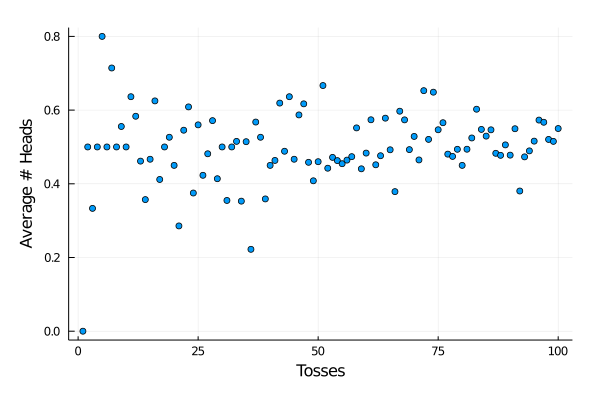

In [17]:
scatter(1:100,meantosses,xlabel="Tosses",ylabel="Average # Heads")

## Some More Monte Carlo
* Can do it for eaven longer simulation to make sure it settles down

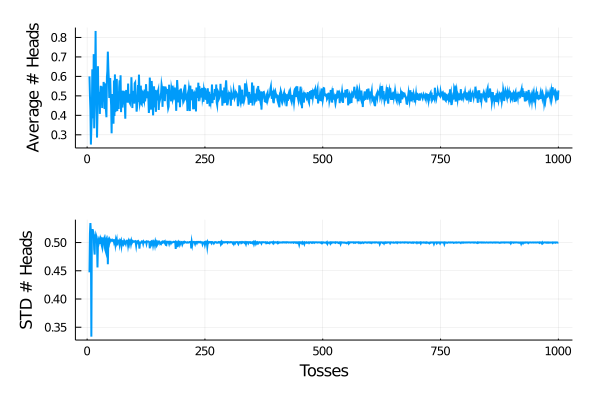

In [18]:
toss_range = 5:1000
meantosses = [mean(flipNcoins(N,0.5)) for N in toss_range]; #This is called a list compression
stdtosses = [std(flipNcoins(N,0.5)) for N in toss_range]; #This is called a list compression
plot(toss_range,meantosses,layout = (2,1),subplot=1,ylabel="Average # Heads")
plot!(toss_range,stdtosses,layout = (2,1),subplot=2,xlabel="Tosses",ylabel="STD # Heads")

## What Does the Distribution Look Like
* We can get an idea for what the distribution heads looks like for 15 tosses
* And compare to truth (Binomial)

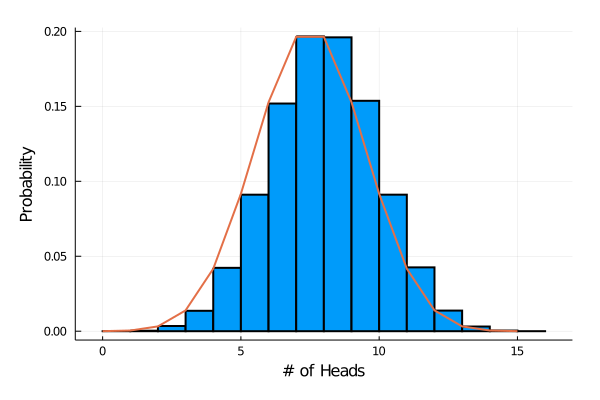

In [19]:
numheads = [sum(flipNcoins(15,0.5)) for k in 1:100_000]
histogram(numheads,bins=25,normalize=:probability,xlabel="# of Heads",ylabel="Probability")
plot!(0:15,pdf.(Binomial(15,0.5),0:15))

## Pseudo Random variables
* One important thing to know is that all random variables on a computer are not really random 
    * They are actually a deterministic sequence
    * But behave random 
    * Depends on what seed is set.  We can change this with `Random.seed!()`

* The following will print `0.5627138851056968`

In [20]:
using Random
Random.seed!(12345) #can put any integer here
rand()

0.5627138851056968

* Will behave the same way again

In [21]:
Random.seed!(12345) #can put any integer here
rand()

0.5627138851056968

# Continuous Processes

## An AR(1)
* Let's model and AR1 processes
$$
    x_t =(1-\rho)μ + \rho x_{t-1} + \epsilon_t 
$$
where $\epsilon_t\sim\mathcal N(0,\sigma)$

* Depends on two key parameters: $\rho$ and $\sigma$

* Can easily write a function to simulate

In [22]:
"""
   simulateAR1(ρ,σ,T)

Simulates an AR(1) with mean μ, persistence ρ, and standard deviation σ for 
T periods with initial value x0
"""
function simulateAR1(μ,ρ,σ,x0,T)
    x = zeros(T+1)# initialize
    x[1] = x0
    for t in 1:T
        x[t+1] = (1-ρ)*μ + ρ*x[t] + σ*randn()
    end
    return x[2:end]
end

simulateAR1

## Plotting and An AR1

* We can see what an AR(1) looks like by plotting an example path

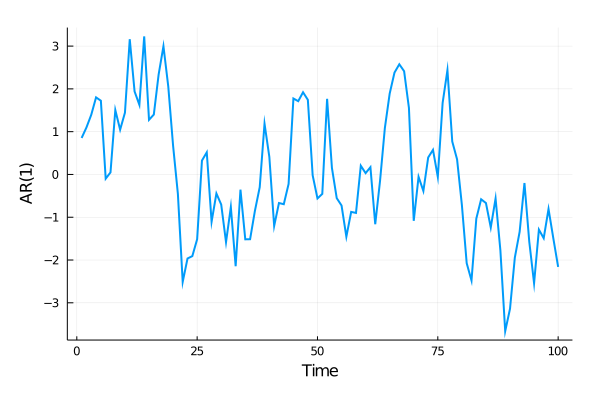

In [23]:
plot(1:100,simulateAR1(0.,0.8,1.,0,100),xlabel="Time",ylabel="AR(1)")

## Structs  
* Many times in julia (and programming) it's construct an Type that represents an object
* For example, our AR1 is represented by three variables: $\rho,\mu,$ and $\sigma$
* We can make an mutable struct which represents this AR(1)

In [24]:
mutable struct AR1
    μ::Float64 #Mean of the AR(1)
    ρ::Float64 #persistence of the AR(1)
    σ::Float64 #standard deviaiton of the AR(1)
end

* Can then construct an instance of that type and access elements through `.`

In [25]:
ar1 = AR1(0.,0.8,1.) #Note order matters here
println(ar1.ρ)

0.8


## Adapting function
* We can now adapt our AR(1) function to use that AR1 type

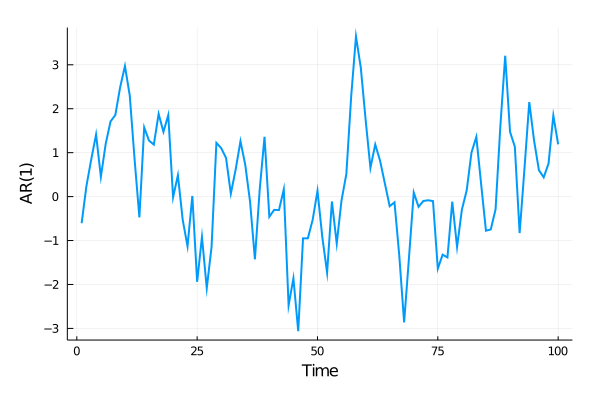

In [26]:
"""
   simulateAR1(ar,x0,T)

Simulates an AR(1) ar for T periods with initial value x0
"""
function simulateAR1(ar,x0,T)
    x = zeros(T+1)# initialize
    x[1] = x0
    for t in 1:T
        x[t+1] = (1-ar.ρ)*ar.μ + ar.ρ*x[t] + ar.σ*randn()
    end
    return x[2:end]
end
plot(1:100,simulateAR1(0.,0.8,1.,0,100),xlabel="Time",ylabel="AR(1)")

## Unpacking parameters
* OK, that `.` notation is annoying.  Is there an easier way?
    * Of course!  We can use a clever package called `Parameters`

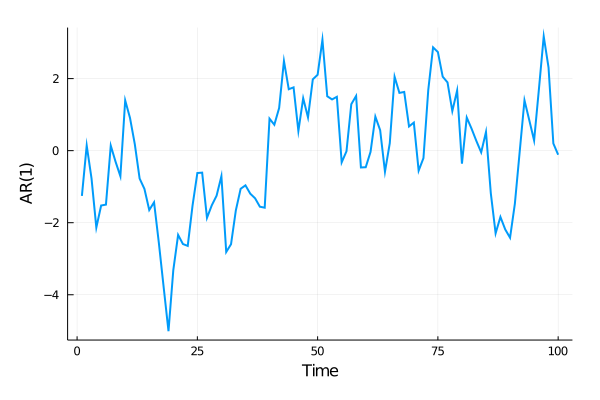

In [27]:
using Parameters
"""
   simulateAR1(ar,x0,T)

Simulates an AR(1) ar for T periods with initial value x0
"""
function simulateAR1(ar,x0,T)
    @unpack σ,μ,ρ = ar #note order doesn't matter
    x = zeros(T+1)# initialize
    x[1] = x0
    for t in 1:T
        x[t+1] = (1-ρ)*μ + ρ*x[t] + σ*randn()
    end
    return x[2:end]
end
plot(1:100,simulateAR1(ar1,0.,100),xlabel="Time",ylabel="AR(1)")

## Some Monte Carlo Experiments
* Let's simulate a large sample of AR1 processes

In [28]:
T = 50
N = 1000
X = zeros(T,N)
for i in 1:N
    X[:,i] .= simulateAR1(ar1,2.,T)
end

* Can visualize all the paths

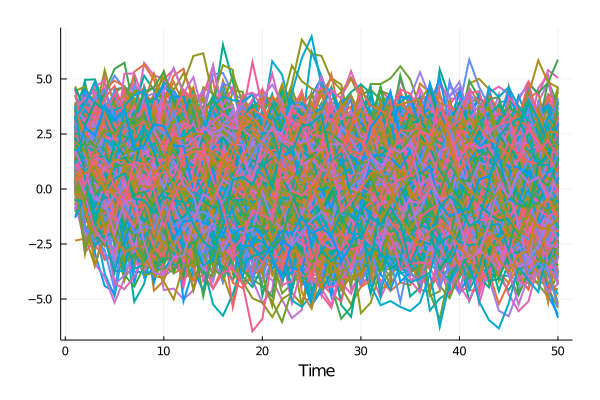

In [29]:
plot(1:T,X,xlabel="Time")

## Mean and Standard Deviation

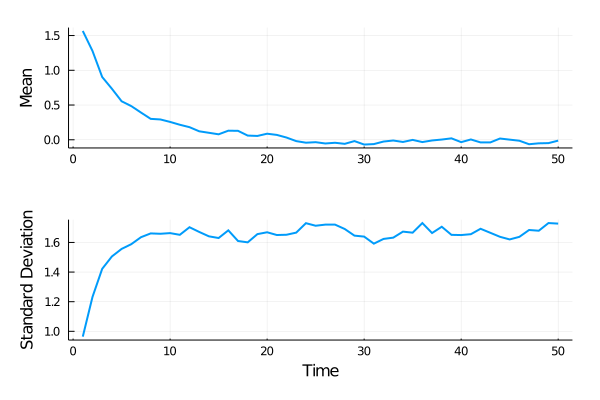

In [30]:
#mean(X,dims=2) takes average across rows
plot(1:T,mean(X,dims=2),ylabel="Mean",layout=(2,1),subplot=1)
plot!(1:T,std(X,dims=2),xlabel="Time",ylabel="Standard Deviation",subplot=2)

# Kalman Filter
## Setup
* The Kalman filter is a famous tool construct an estimate of a hidden state from noisy data

* We assume the following state space system
    * $x_t$ is a $n\times1$ state vector unobservable to the econometrician
    * $y_t$ is a $m\times1$ vector of data then depends on $x_t$ in a noisy manner
$$\begin{aligned}
x_{t+1} =& A x_t + C w_{t+1}\\
y_t =&Gx_t + v_t
\end{aligned}$$
* Where 
    * $w_{t+1}$ is $p\times 1$ an iid sequence of standard normal variables
    * $v_t$ is a iid sequence of normal variables with covaraince $R$

* Initial beliefs
$$
    x_0\sim\mathcal N(\hat x_0,\Sigma_0)
$$
* We are using $\hat x$ to denote expectation of $x$ given current information
    
## Outline
* We'll approach this recursively:
    * Enter with beliefs $\hat x_0,\Sigma_0$
    * Recieve data: $y_0$
    * Update beliefs: $\hat x_1,\Sigma_1$
    * Repeat.....

* From environment we can back out the anticipated distribution of $y_0$ as
$$
y_0\sim\mathcal N\left(G\hat x_0,G\Sigma_0G' + R\right)
$$
so we know that 
$$
    a_0\equiv y_0 - G\hat x_0 \sim \mathcal N\left(0,G\Sigma_0G' + R\right)
$$

* Question: if we observe $a_0$ how much can we attribute to $x_0$ and how much to $v_0$?

## Some Population Regressions
* Want to construct a relationship
$$
    x_0 - \hat x_0 = L_0a_0 + \eta 
$$ 
that is unbiased: $\mathbb E\eta = 0$.

* Least squares orthogonality condition implies
$$
\mathbb E(x_0-\hat x_0)a_0' = L_0 \mathbb E a_0a_0'
$$
* Given that $a_0 = G(x_0-\hat x_0) + v_t$ with $v_t$ orthogonal we have
$$
    \Sigma_0G' = L_0\left(G\Sigma_0G' +R\right)
$$
or
$$
    L_0 = \Sigma_0G'\left(G\Sigma_0G' +R\right)^{-1}
$$
* This is the first step:
    * Gives: $\mathbb E[x_0|y_0]=\hat x_0 + L_0a_0$
    * Want: $\hat x_1 = \mathbb E[x_1|y_0]$ and $\Sigma_1$

## Updating beliefs
* Our LOM for $x_1$ implies 
$$
    x_1 = A\hat x_0 + A(x_0 -\hat x_0) +C w_1
$$
* Take expectations conditionaly on $y_0$ to get
$$
    \hat x_1 \equiv \mathbb E[x_1|y_0] = A\hat x_0 + AL_0a_0\equiv A \hat x_0 + K_0a_0
$$
* Subtracting these equations gives
$$
    x_1 -\hat x_1 = A(x_0-\hat x_0) +C w_1 - K_0 a_0
$$
* Taking expectations of $(x_1 -\hat x_1)(x_1 -\hat x_1)'$ yields
$$
    \Sigma_1 = (A - K_0G)\Sigma_0(A - K0G)' + CC' + K_0 RK_0' 
$$

## The Kalman Filter
* Combining all of these insights we have the Kalman Filter
$$\begin{align}
    a_t &= y_t - G\hat x_t\\
    K_t &= A\Sigma_t G'(G\Sigma_tG' +R)^{-1}\\
    \hat x_{t+1}&=A\hat x_t + K_t a_t\\
    \Sigma_{t+1} &= CC' + K_t R K_t' + (A - K_tG)\Sigma_t(A-K_tG)'
\end{align}$$

## Implementing The Kalman Filter

In [31]:
@with_kw mutable struct KalmanFilter #The @with_kw allows us to given default values
    #Parameters
    A::Matrix{Float64} = [0.9][:,:]
    G::Matrix{Float64} = [1.][:,:]
    C::Matrix{Float64} = [1.][:,:]
    R::Matrix{Float64} = [1.][:,:]

    #Initial Beliefs
    x̂0::Vector{Float64} = [0.]
    Σ0::Matrix{Float64} = [1.][:,:]
end

KalmanFilter

## Implementing The Kalman Filter Cont.

In [32]:
"""
    updateBeliefs(KF::KalmanFilter,y,x̂,Σ)

Uses the Kalman Filter to update beliefs x̂,Σ using data y 
"""
function updateBeliefs(KF::KalmanFilter,y,x̂,Σ)
    @unpack A,G,C,R = KF
    a = y - G*x̂
    K = A*Σ*G'*inv(G*Σ*G'+R)
    x̂′= A*x̂ + K*a
    Σ′ = C*C' + K*R*K' + (A-K*G)*Σ*(A' - G'*K')
    
    return x̂′,Σ′
end

updateBeliefs

## Implementing The Kalman Filter Cont.

In [33]:
"""
    applyFilter(KF::KalmanFilter,y)

Applies the Kalman Filter on data y. Assume y is mxT where 
T is the number of periods
"""
function applyFilter(KF::KalmanFilter,y)
    @unpack x̂0,Σ0 = KF

    T = size(y,2) #how many rows are y
    x̂ = zeros(length(x̂0),T+1)
    Σ = zeros(length(x̂0),length(x̂0),T+1) #note 3 dimensional array
    x̂[:,1] .= x̂0
    Σ[:,:,1] .= Σ0
    for t in 1:T
        x̂[:,t+1],Σ[:,:,t+1] = updateBeliefs(KF,y[:,t],x̂[:,t],Σ[:,:,t])
    end

    return x̂,Σ
end

applyFilter

## Examples
* Let's apply the Kalman filter to the following AR(1)
$$\begin{align}
    x_{t+1} &= 0.95 x_t + w_t\\
    y_t =&= 2x_t + v_t 
\end{align}$$

* Implies $A=[0.95]$, $C=[1.]$, $G=[2.]$, $R=[1.]$

* Set initial beliefs to be ergodic distirbution of $x_t$
    * $\hat x_0 =0$, $\Sigma_0=1/(1-0.95)$

In [34]:
KF = KalmanFilter(A=[0.95][:,:],C=[1.][:,:], G=[2.][:,:],R=[1.][:,:],x̂0=[0.],Σ0=[1/(1-0.95)][:,:])

KalmanFilter
  A: Array{Float64}((1, 1)) [0.95]
  G: Array{Float64}((1, 1)) [2.0]
  C: Array{Float64}((1, 1)) [1.0]
  R: Array{Float64}((1, 1)) [1.0]
  x̂0: Array{Float64}((1,)) [0.0]
  Σ0: Array{Float64}((1, 1)) [19.999999999999982]


## Kalman Filter Monte Carlo

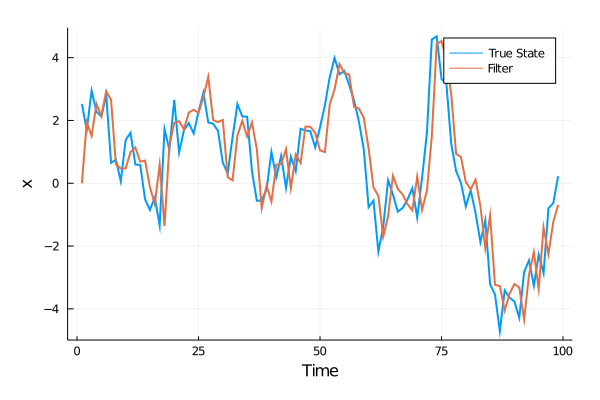

In [35]:
#First generate data
T = 99
x = simulateAR1(0.0,0.95,1.,1.,T)
y = 2*x .+ randn(T)

#Now perform Kalman filter
x̂,Σ = applyFilter(KF,y') #note we need y to be a row

plot(1:T,x,xlabel="Time",ylabel="x",label="True State",legend=true)
plot!(1:T,x̂[1:T],label="Filter")

## What Happens If We Increase $G$ to 20 from 2?

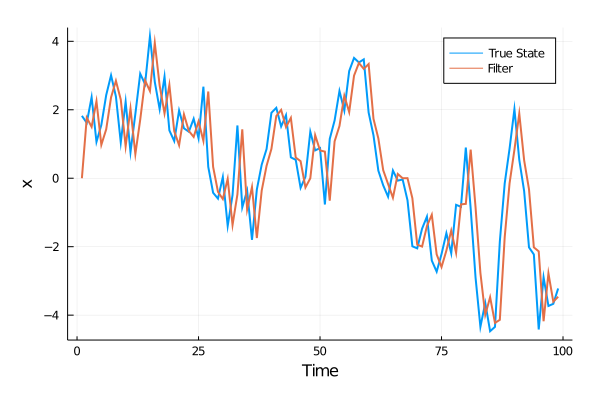

In [36]:
x = simulateAR1(0.0,0.95,1.,1.,T)
y = 20*x .+ randn(T)
KF.G .= 20.
#Now perform Kalman filter
x̂,Σ = applyFilter(KF,y') #note we need y to be a row
plot(1:T,x,xlabel="Time",ylabel="x",label="True State",legend=true)
plot!(1:T,x̂[1:T],label="Filter")

## What Happens If We Decrease $G$ to .2 from 2?

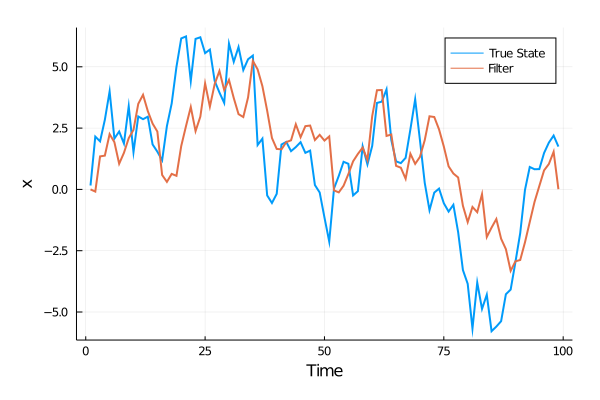

In [37]:
x = simulateAR1(0.0,0.95,1.,1.,T)
y = 0.2*x .+ randn(T)
KF.G .= 0.2
#Now perform Kalman filter
x̂,Σ = applyFilter(KF,y') #note we need y to be a row

plot(1:T,x,xlabel="Time",ylabel="x",label="True State",legend=true)
plot!(1:T,x̂[1:T],label="Filter")

# Finite State Processes

## Markov Chains
* Finite State Markov Chains are the building blocks of modern macro

* Idea: random variable $X_t$ takes values in a finite set $X̄$ of length $S$
    * Index values of $\bar X$ by $s=1,2,\ldots,S$
    * Satisfies markov property
    $$
        \text{Pr}\left(X_t|X_{t-1},X_{t-2},\ldots\right) = \text{Pr}\left(X_t|X_{t-1}\right)
    $$

* Therefore $X_t$ is defined entirely by
    * $\bar X$: A vector of values for each states 
    * $\pi_0$: An initial probability distribution for $X_0$
    * $P$: A transition matrix that records
    $$
    P_{ij} = \text{Pr}\left(X_t=\bar X[j]|X_t = \bar X[i]\right)
    $$

## Properties of Markov Chains
* Conditional expectations are matrix multiplacation
$$
    \mathbb E\left[X_{t+1}|X_t=\bar X[i]\right] = (P\bar X)_i
$$
and
$$
    \mathbb E\left[X_{t+k}|X_t=\bar X[i]\right] = (P^k\bar X)_i
$$ 
* Conditional probabilities are easy to compute
$$
    \text{Pr}\left[X_{t+k}=\bar X[j]|X_t=\bar X[i]\right] = (P^k)_{ij}
$$ 
* Computing unconditional distirbution is matrix multiplication
$$
    \pi_t' = \pi_0'P^t 
$$
* Stationary distributions $\pi^*$ are left-eigenvectors
$$
    (\pi^*)'=(\pi^*)'P
$$

## Simulating Markov Chain

* We could spend time creating our own function to simulate markov Chains

* Or we could use something prepackaged (don't reinvent the wheel)

* QuantEcon has a lot of helpful libraries

In [38]:
using QuantEcon

* In this case we can use `simulate`

In [39]:
P = [0.6 0.4;
     0.4 0.6]
s = simulate(MarkovChain(P),100,init=1)
println(s)

[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2]


## Rouwenhorst 

* QuantEcon also has a pre-packaged Rouwenhorst method
    * Approximates an AR(1) (see homework)

In [40]:
mc_ar1 = rouwenhorst(51,0.9,0.014)

Discrete Markov Chain
stochastic matrix of type Matrix{Float64}:
[0.07694497527671314 0.2024867770439822 … 8.437694987151553e-63 8.881784197001648e-66; 0.004049735540879644 0.08738903009266591 … 1.5711876244495882e-61 1.6875389974303114e-64; … ; 1.6875389974303114e-64 1.571187624449588e-61 … 0.08738903009266591 0.004049735540879644; 8.881784197001648e-66 8.437694987151553e-63 … 0.2024867770439822 0.07694497527671314]

* Let's try some monte carlo

In [41]:
X = zeros(15,1000)
for i in 1:1000
    X[:,i] = simulate(mc_ar1,15,init=1)
end
println(mean(X[15,:]))

-0.0522988884011888


* Compare to formula

In [42]:
P,X̄ = mc_ar1.p,mc_ar1.state_values
println((P^14*X̄)[1])

-0.05195548096140177


## Long Run Stationary Distribution
* We can compute the stationary distribution of this Chain
* Two ways:

In [43]:
using LinearAlgebra
D,V = eigen(P')  #should be left unit eigenvector
πstar = V[:,isapprox.(D,1)][:]
πstar ./= sum(πstar)#Need to normalize for probability

#or 

πstar2 = (P^200)[15,:] #probability distribution 1000 periods in the future
println(norm(πstar -πstar2))

4.4008184336270764e-10


* Surprisingly the second can often be faster (need to check how many periods)

In [44]:
@time D,V = eigen(P');
@time πstar2 = (P^200)[15,:];

  0.000771 seconds (21 allocations: 96.609 KiB)
  0.000132 seconds (20 allocations: 184.578 KiB)


## Compare to Monte Carlo

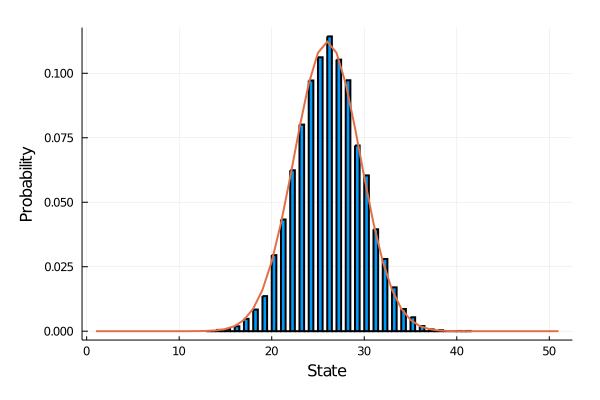

In [45]:
s_end = zeros(Int,10000)
for i in 1:10000
    s_end[i] = simulate_indices(mc_ar1,200,init=1)[end]
end

histogram(s_end,bins=51,normalize=:probability,xlabel="State",ylabel="Probability")
plot!(1:51,πstar2)